In [1]:
import os
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

In [2]:
path = '2M_prems_to_wd/LOGS/'
path
h = mr.MesaData(path+'history.data')
l = mr.MesaLogDir(path)

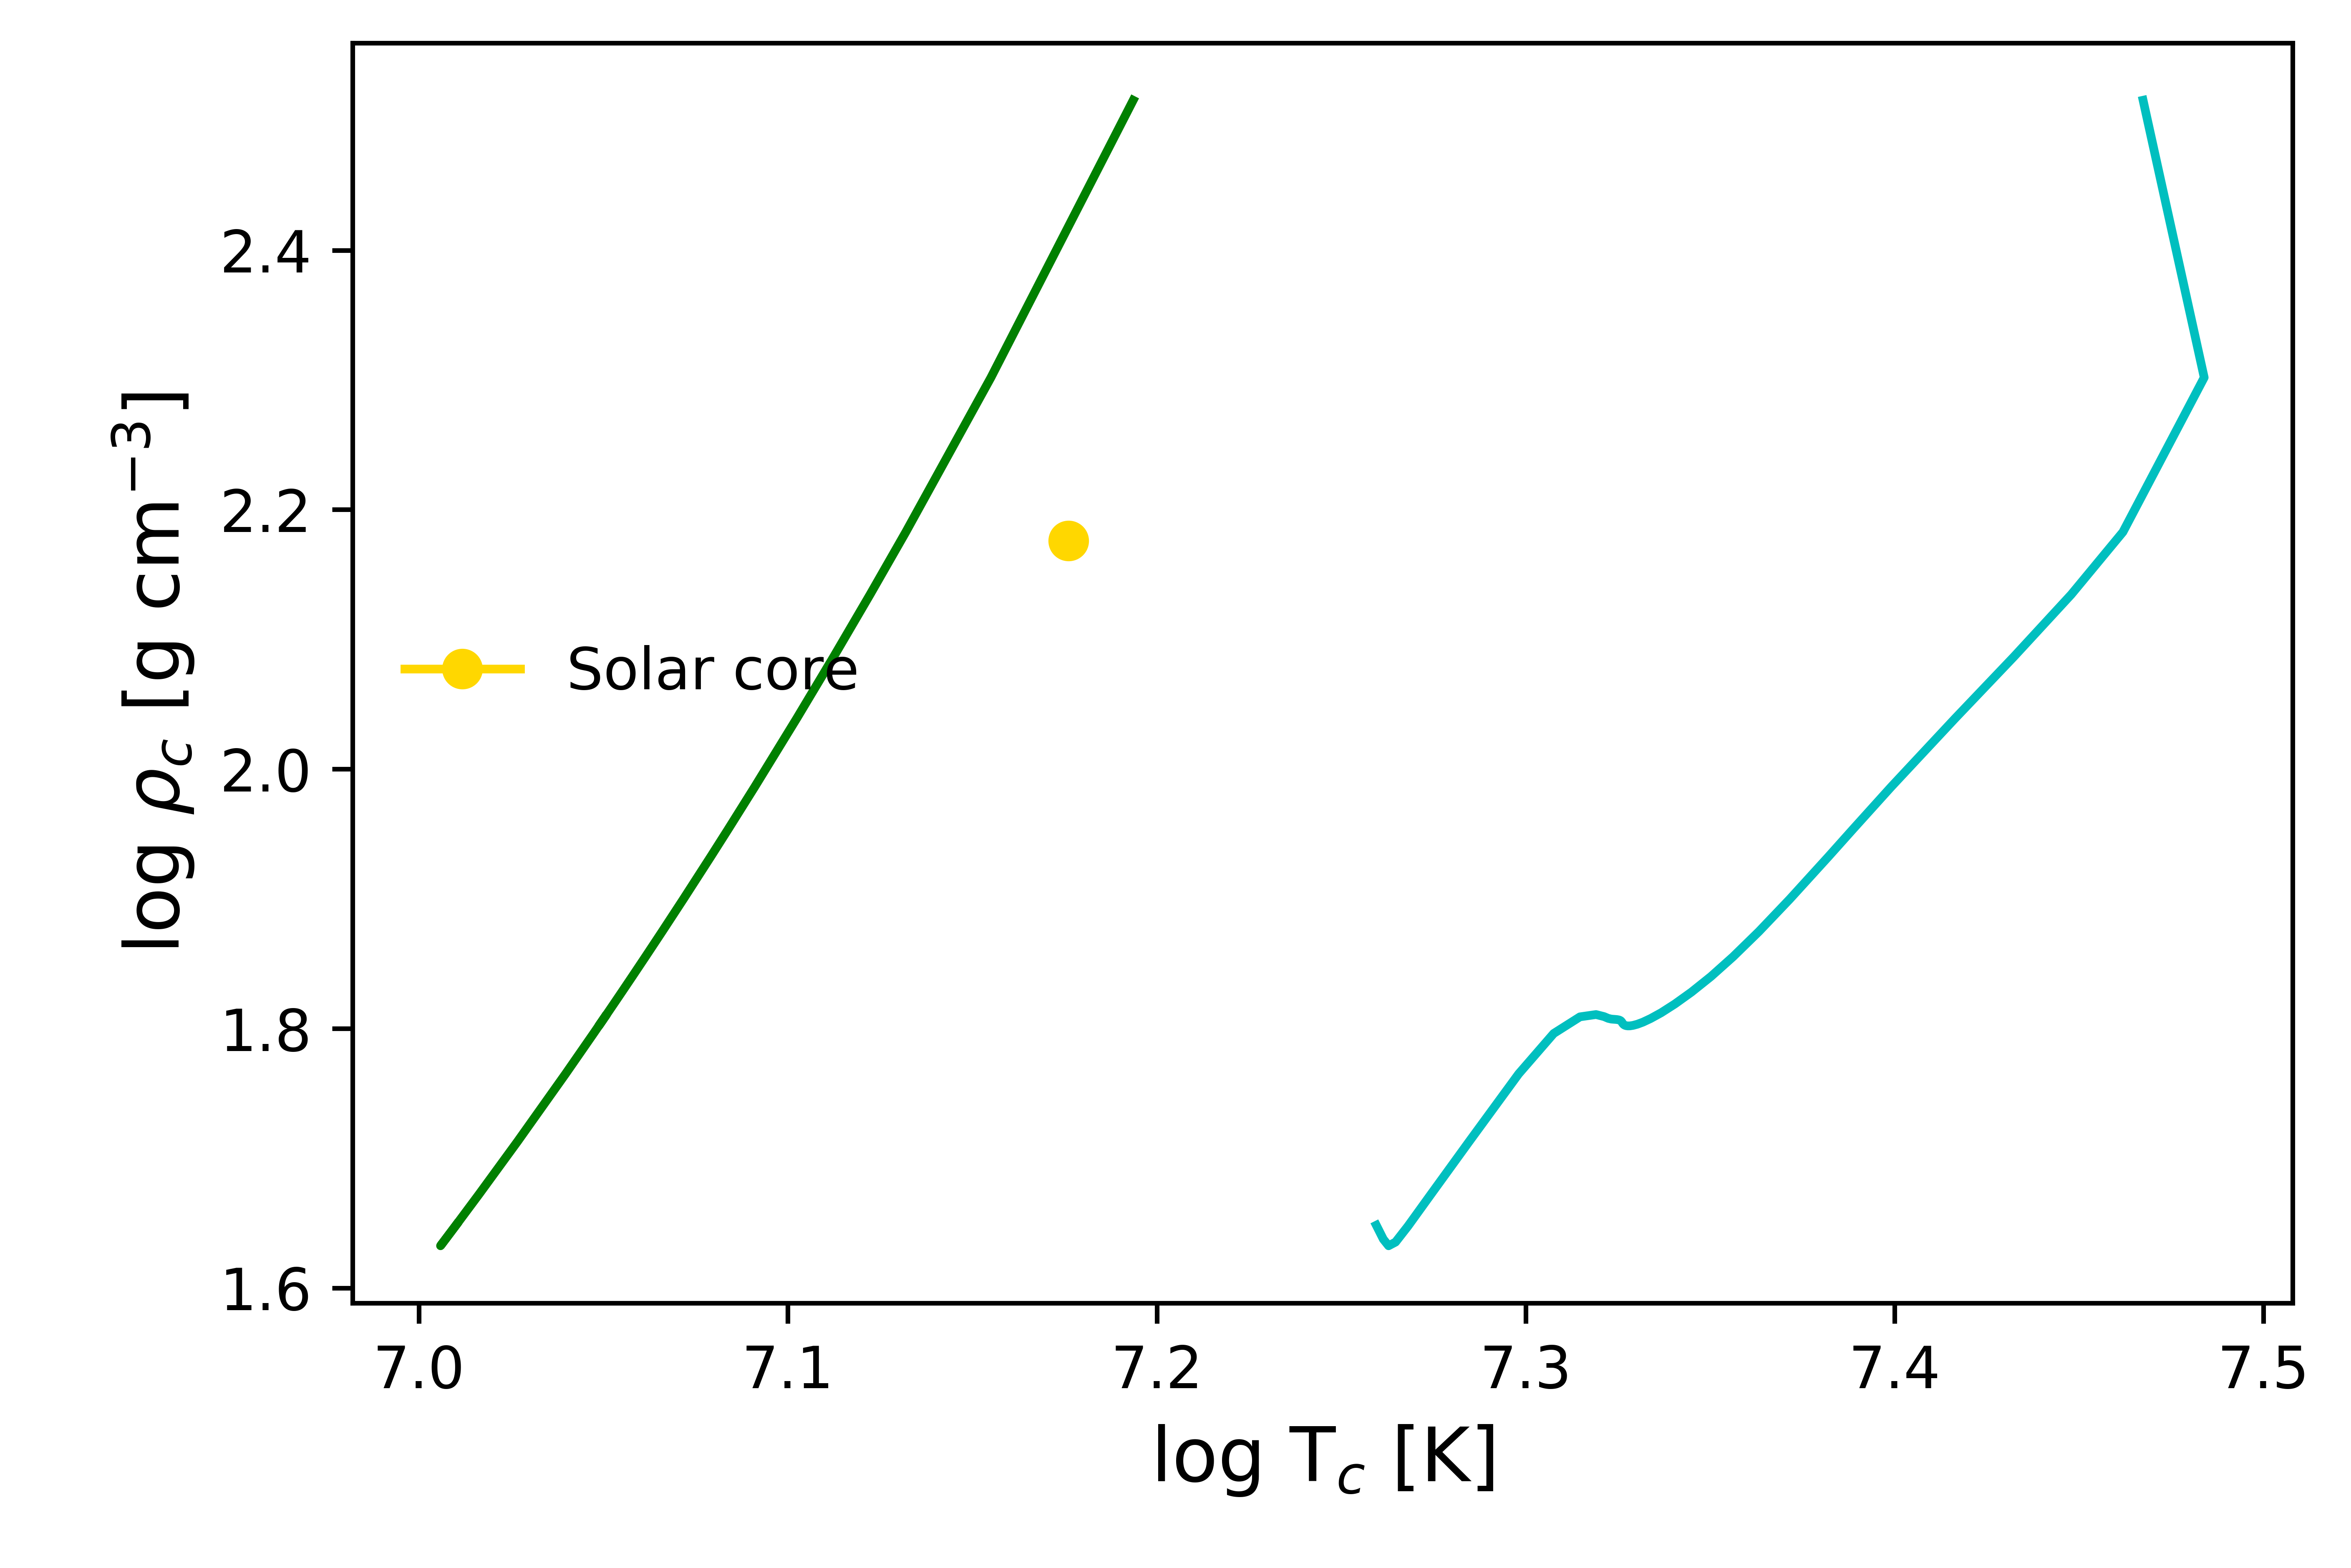

In [61]:
fig = plt.figure(dpi=1000)
# stellar core: temperature vs density
rho_solar_core = np.log10(150) # [g/cm**3]
temp_solar_core = np.log10(1.5e7) # [K]

# equations of states
# constants 
C = 0.4 # constant varies between 0.48 and 0.36
G = 6.67e-8 # gravitational constant [cm^3⋅g^−1⋅s^−2]
R = 8.3145e7 # gas constant [erg/deg-mol]
# molecular weight of main sequence
mu = np.mean(h.center_mu[248:301])
M = 2e33*np.mean(h.star_mass[248:301])
#logT_pre = np.log10(C*G/R*mu*M**(2/3)*h.log_center_Rho[200:249])
logT_main = np.log10((C*G/R*mu*M**(2/3)*h.log_center_Rho[248:301]))
#logT_agb = np.log10(C*G/R*mu*M**(2/3)*h.log_center_Rho[300:5801])
#logT_wd = np.log10(C*G/R*mu*M**(2/3)*h.log_center_Rho[5800:])
#plt.plot(logT_pre, h.log_center_Rho[:249], c='g')
plt.plot(logT_main, h.log_center_Rho[248:301], c='g')
#plt.plot(logT_agb, h.log_center_Rho[300:5801], c='g')
#plt.plot(logT_agb, h.log_center_Rho[5800:], c='g')


#plt.plot(h.log_center_T[:249], h.log_center_Rho[:249], c='b')
plt.plot(h.log_center_T[248:301], h.log_center_Rho[248:301], c='c')
#plt.plot(h.log_center_T[300:5801], h.log_center_Rho[300:5801], c='r')
#plt.plot(h.log_center_T[5800:], h.log_center_Rho[5800:], c='k')
plt.plot(temp_solar_core, rho_solar_core, marker='o', c='gold', label='Solar core')

plt.annotate('pre-main sequence: 6.89 My',color='b',xy=(5.5,6),xytext=(5.5,6),fontsize=13)
plt.annotate('main sequence: 0.944 Gy',color='c',xy=(5.5,5),xytext=(5.5,5),fontsize=13)
plt.annotate('AGB sequence: 1.21 Gy',color='r',xy=(5.5,4),xytext=(5.5,4),fontsize=13)
plt.annotate('white dwarf sequence: 1.22 Gy',color='k',xy=(5.5,3),xytext=(5.5,3),fontsize=13)

plt.xlabel(r'log T$_c$ [K]', fontsize = 13)
plt.ylabel(r'log $\rho_c$ [g cm$^{-3}$]', fontsize = 13)
plt.legend(loc='center left', frameon=False)

plt.show()

0.006899348742911126
0.9438995557572025
1.2096352805328596
1.2245229059988216


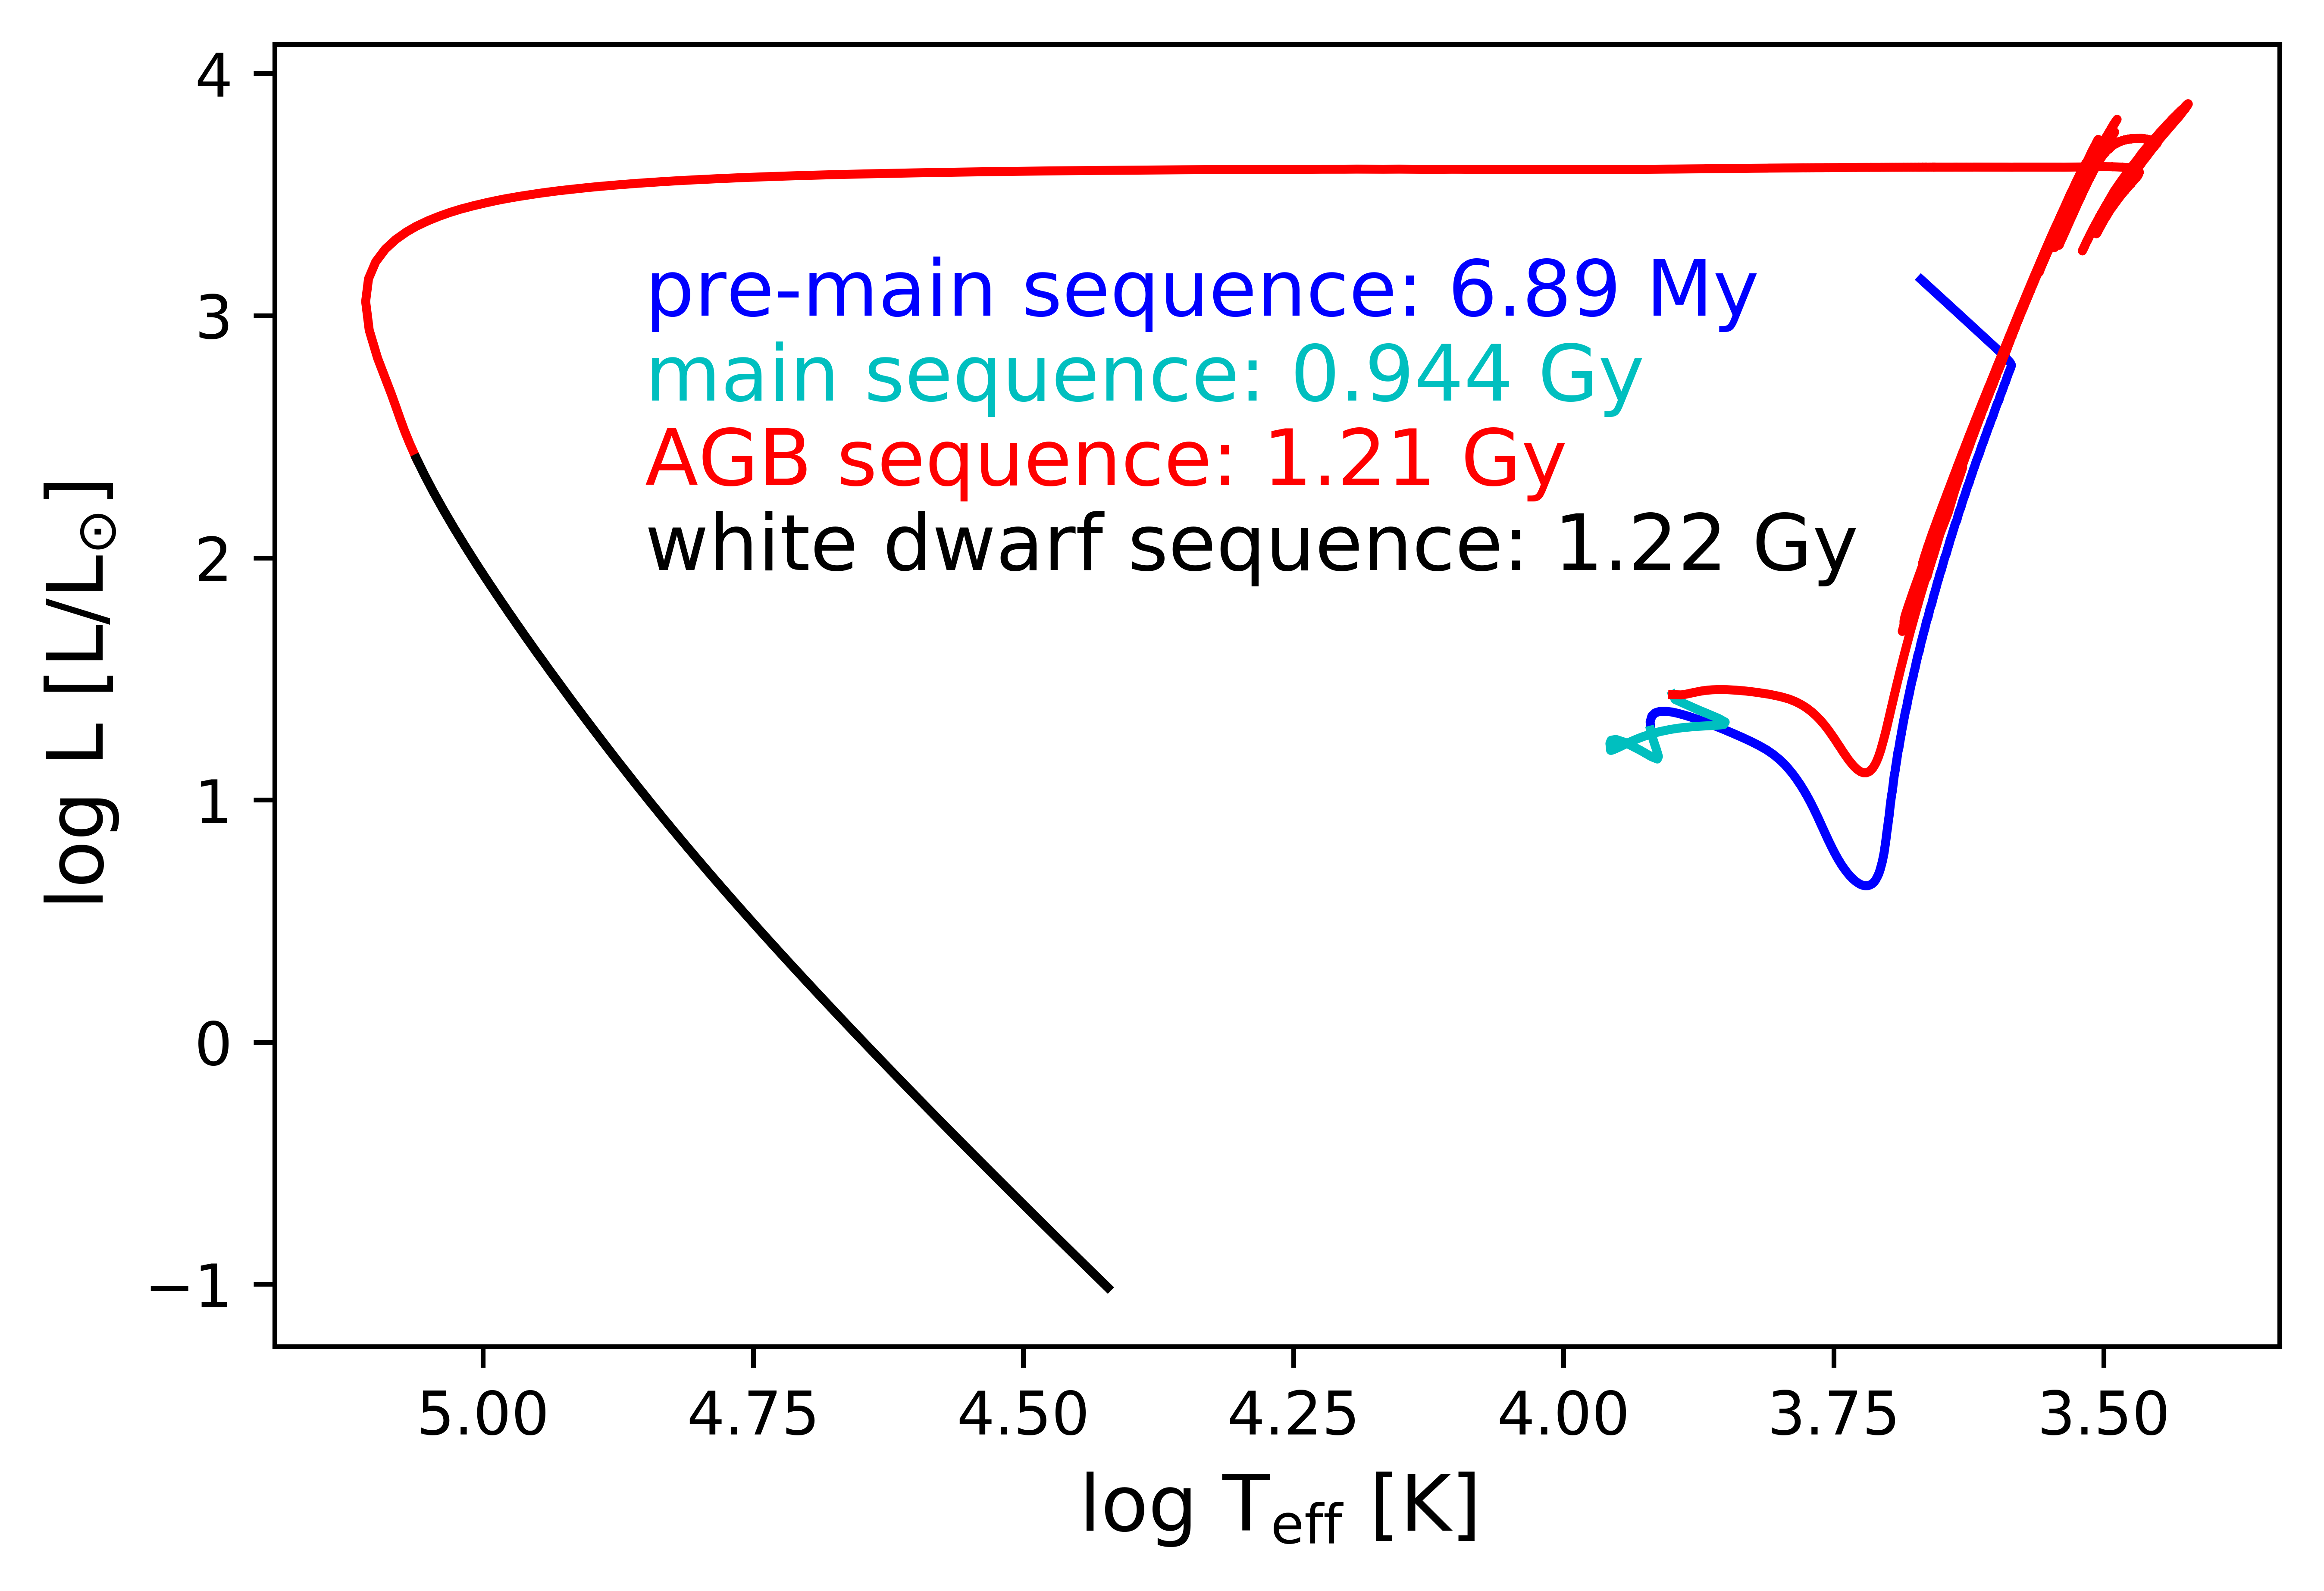

In [4]:
fig = plt.figure(dpi=1000)

# hr diagram
plt.plot(h.log_Teff[0:249],h.log_L[0:249],c='b') # pre-main sequence
prems_age = h.star_age[249]
print(prems_age/1e9)

plt.plot(h.log_Teff[248:301],h.log_L[248:301],c='c') # main sequence
ms_age = h.star_age[301]
print(ms_age/1e9)

plt.plot(h.log_Teff[300:5801],h.log_L[300:5801],c='r') # red-giant branch (agb) phase
agb_age = h.star_age[5801]
print(agb_age/1e9)

plt.plot(h.log_Teff[5800:],h.log_L[5800:],c='k') # white dwarf ascension
wd_age = h.star_age[5864]
print(wd_age/1e9)

# annotations
plt.annotate('pre-main sequence: 6.89 My',color='b',xy=(4.85,3),xytext=(4.85,3),fontsize=13)
plt.annotate('main sequence: 0.944 Gy',color='c',xy=(4.85,2.65),xytext=(4.85,2.65),fontsize=13)
plt.annotate('AGB sequence: 1.21 Gy',color='r',xy=(4.85,2.3),xytext=(4.85,2.3),fontsize=13)
plt.annotate('white dwarf sequence: 1.22 Gy',color='k',xy=(4.85,1.95),xytext=(4.85,1.95),fontsize=13)

# aesthetics 
plt.xlabel('log T$_{\mathrm{eff}}$ [K]',fontsize = 13)
plt.ylabel(r'log L [L/L$_{\odot}$]',fontsize = 13)
plt.gca().invert_xaxis()

plt.show()

profile is 0.00214 billion years old


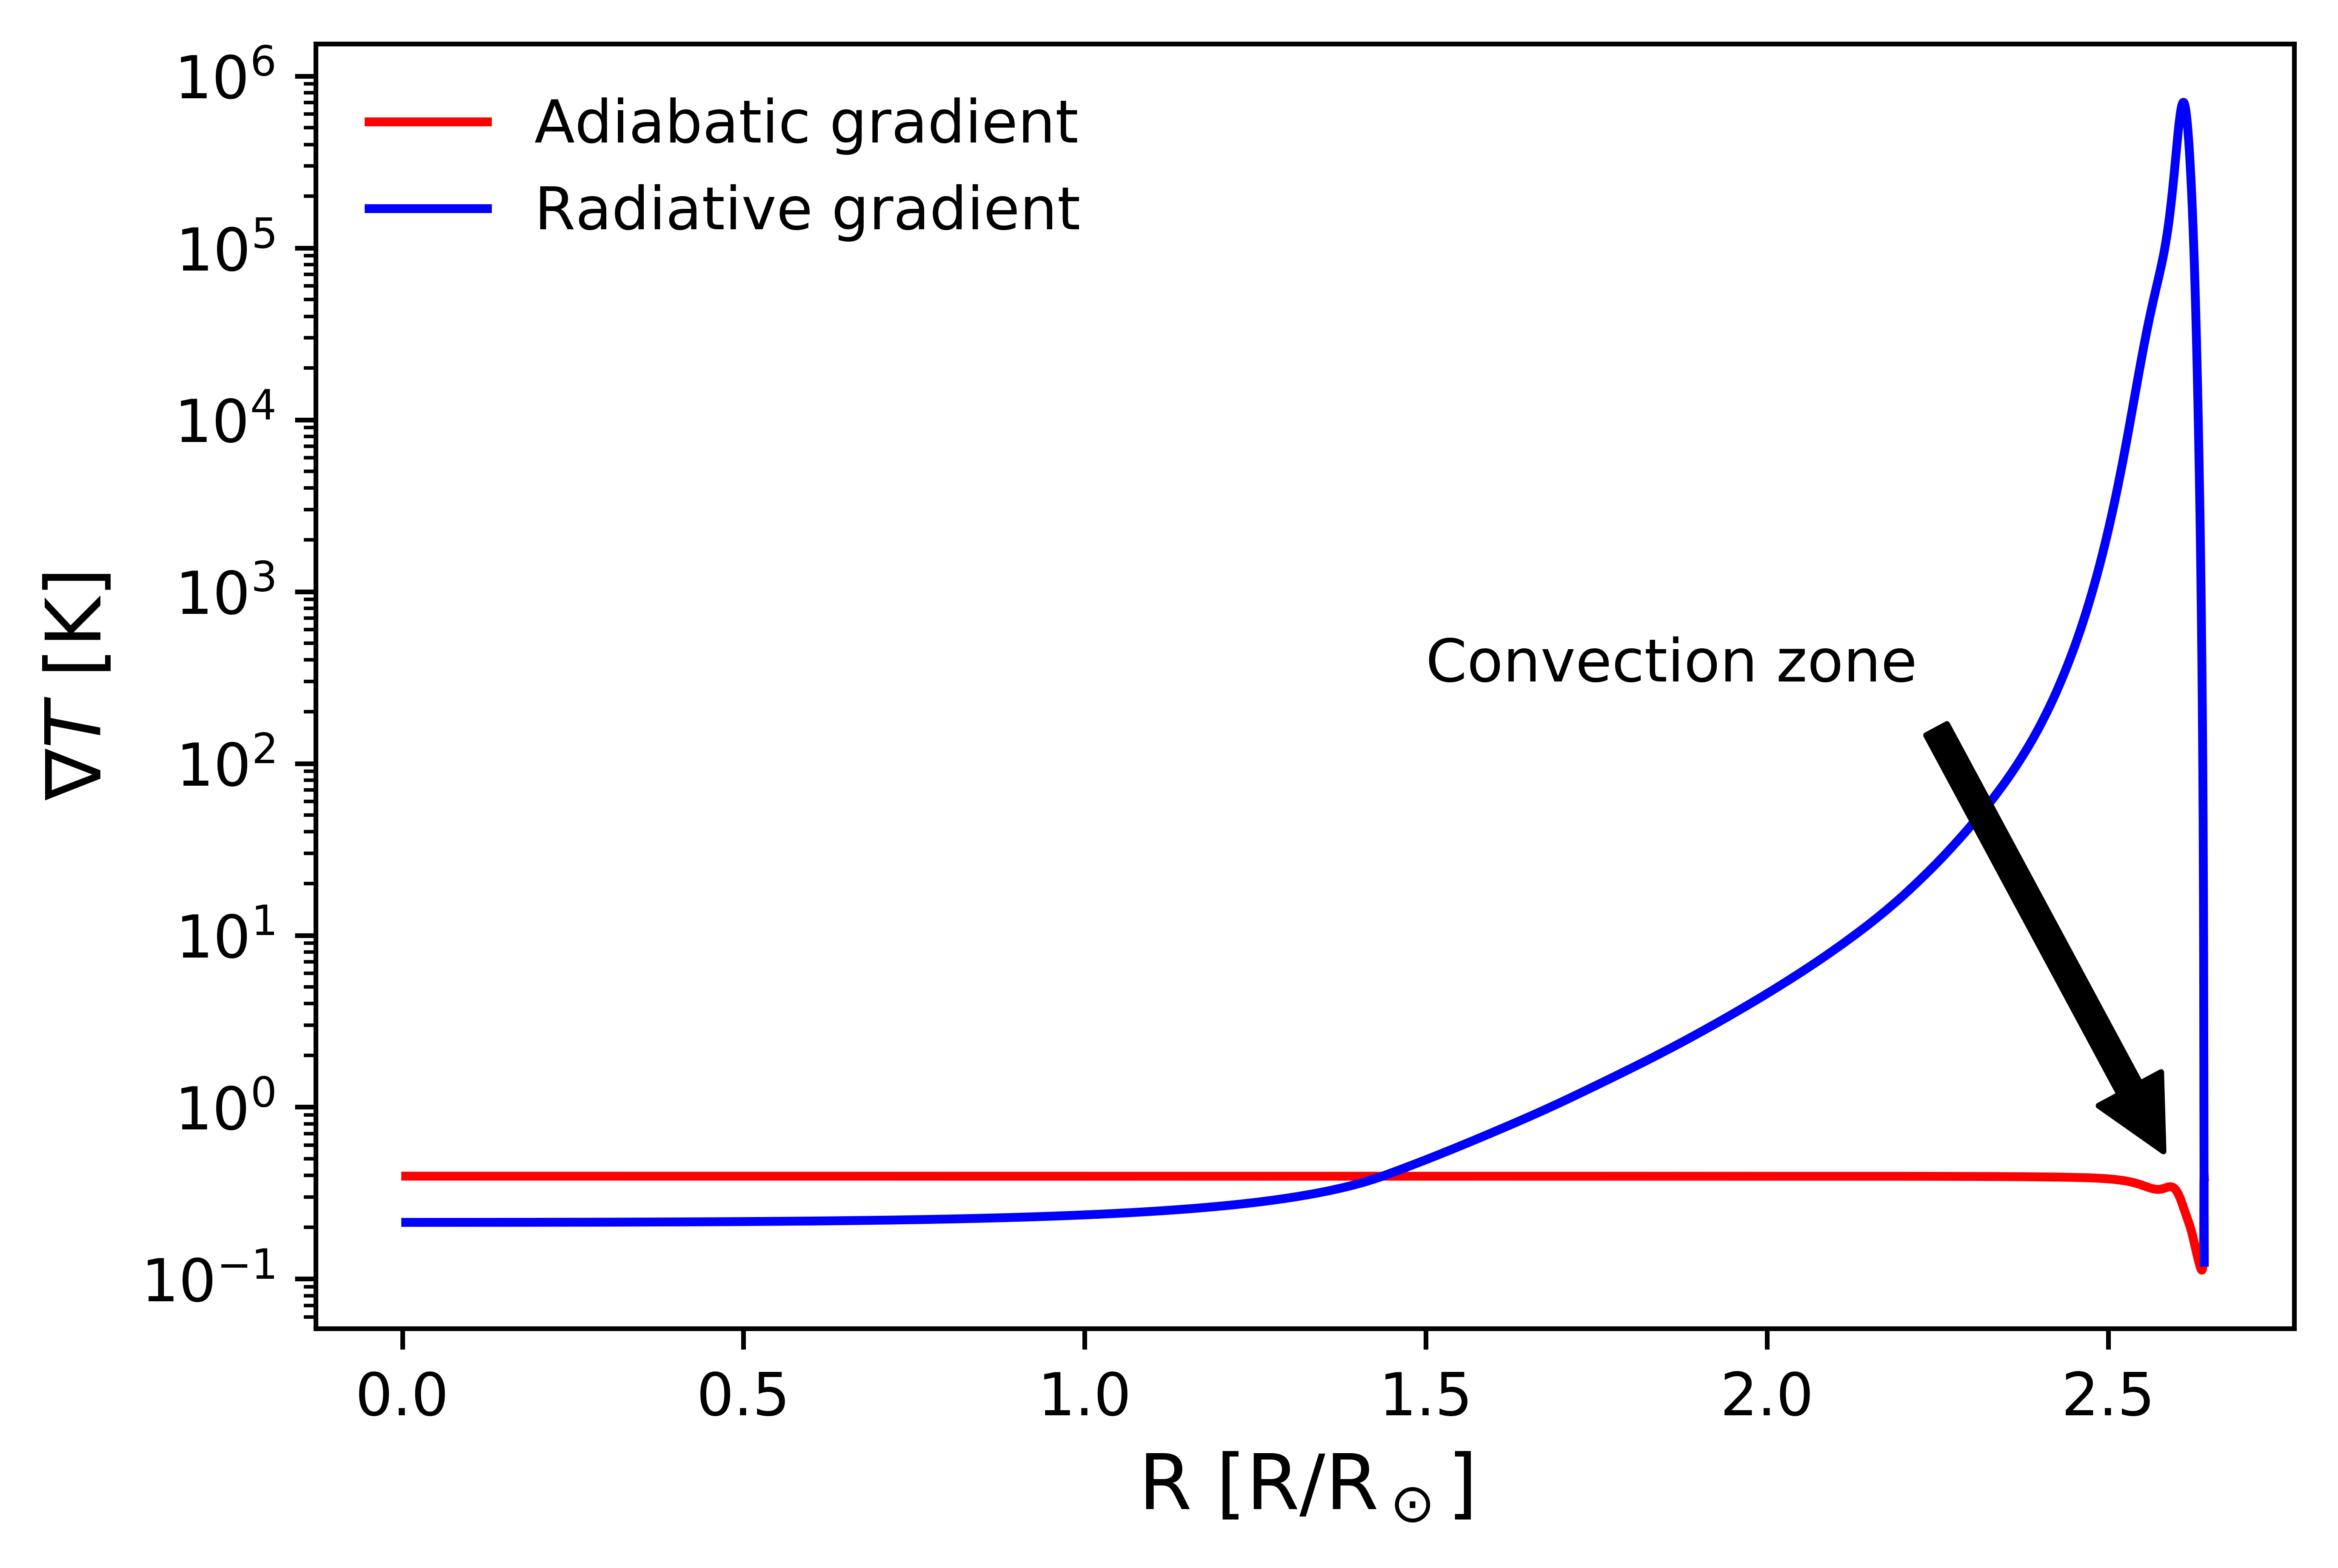

In [5]:
# convection in the pre-main sequence
fig = plt.figure(dpi=1000)
pre_ms = l.profile_data(profile_number=5) # pre-main sequence
x = pre_ms.star_age
print(f'profile is {round(x/1e9,5)} billion years old')
plt.semilogy(pre_ms.R,pre_ms.grada,c='r',label='Adiabatic gradient')
plt.semilogy(pre_ms.R,pre_ms.gradr,c='b',label='Radiative gradient')

plt.annotate('Convection zone', xy=(2.6, 0.4), xytext=(1.5, 300),arrowprops=dict(facecolor='k', shrink=0.05))
plt.xlabel(r'R [R/R$_\odot$]',fontsize = 13)
plt.ylabel(r'$\nabla T$ [K]',fontsize = 13)
plt.legend(frameon=False)
plt.show()

profile is 0.655935 billion years old


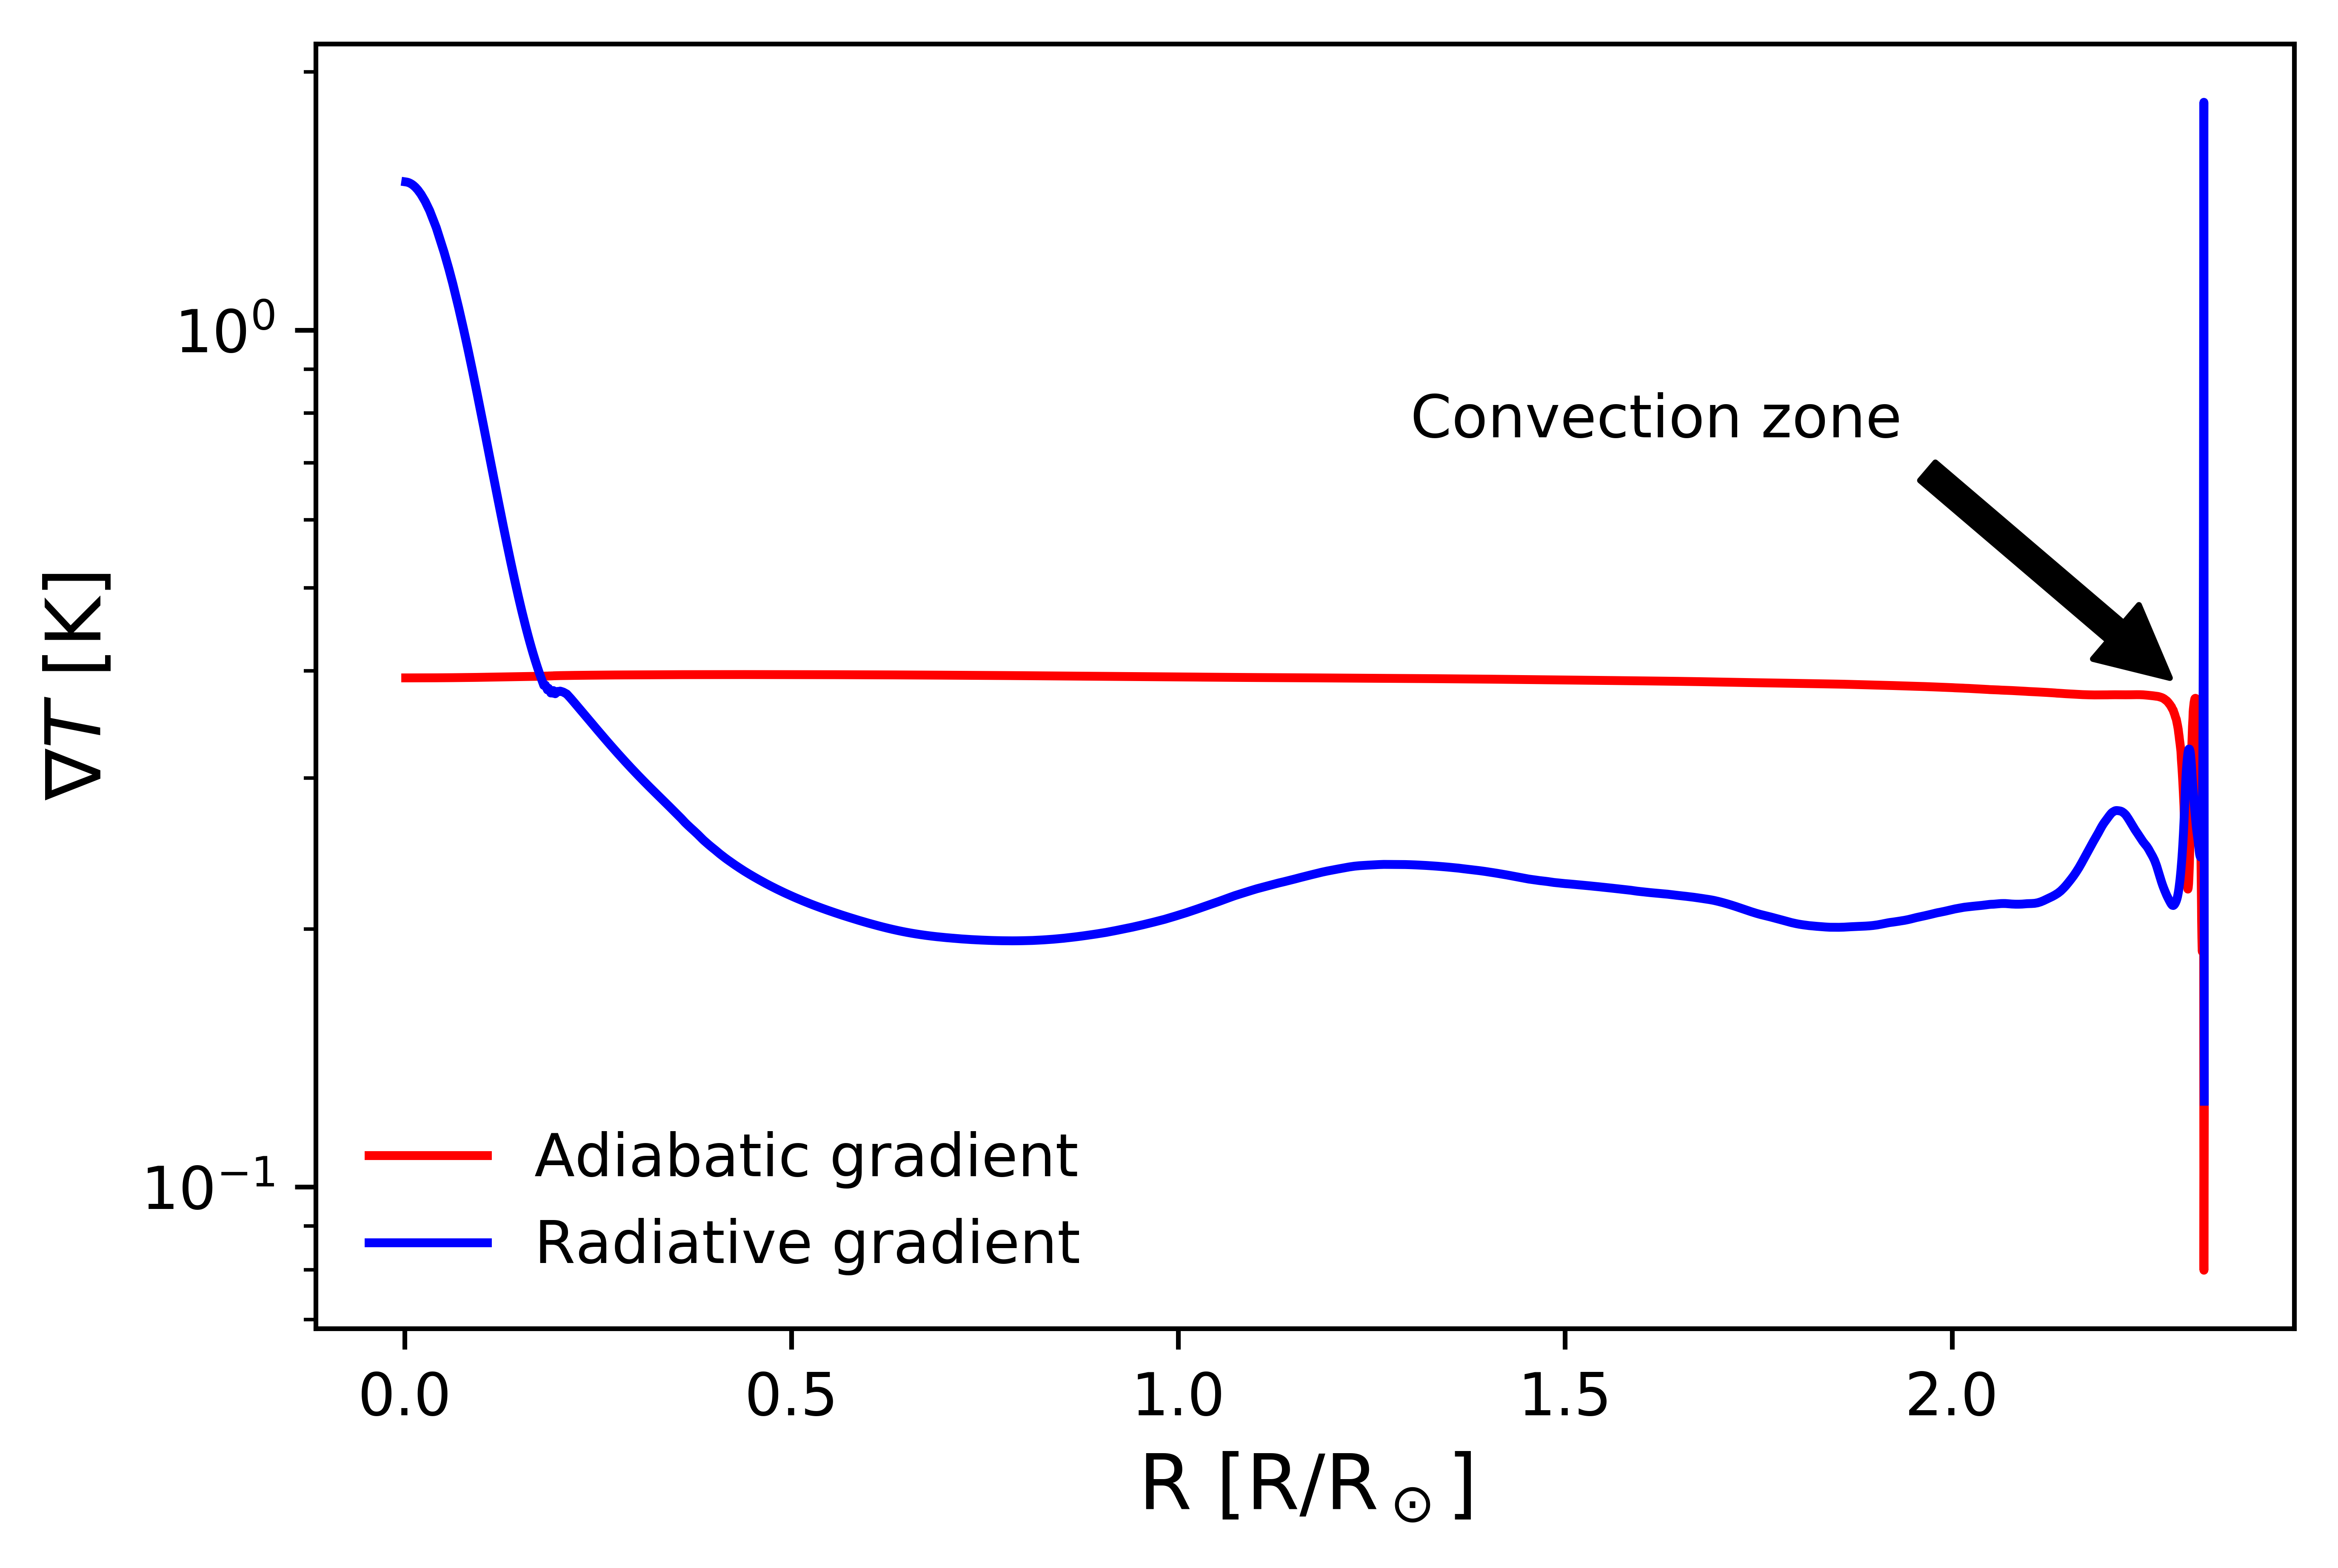

In [6]:
# convection in the main sequence
fig = plt.figure(dpi=1000)
ms = l.profile_data(profile_number=8) # main sequence
y = ms.star_age
print(f'profile is {round(y/1e9,6)} billion years old')
plt.semilogy(ms.R,ms.grada,c='r',label='Adiabatic gradient')
plt.semilogy(ms.R,ms.gradr,c='b',label='Radiative gradient')

plt.annotate('Convection zone', xy=(2.3, 0.38), xytext=(1.3, 0.75),arrowprops=dict(facecolor='k', shrink=0.05))
plt.xlabel(r'R [R/R$_\odot$]', fontsize = 13)
plt.ylabel(r'$\nabla T$ [K]', fontsize = 13)
plt.legend(frameon=False)
plt.show()